### Deep Learning Practical - 2

Title - Convolutional neural network (CNN) : Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print('Number of images in training set {}'.format(X_train.shape))
print('Number of labels in training set {}'.format(y_train.shape))
print('Number of images in test set {}'.format(X_test.shape))
print('Number of labels in test set {}'.format(y_test.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (10000,)


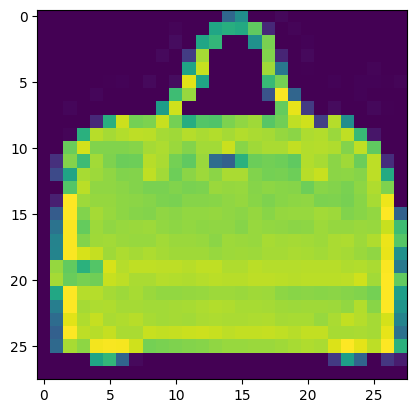

In [8]:
plt.figure()
plt.imshow(np.squeeze(X_train[220]))

In [10]:
y_train[220]

np.uint8(8)

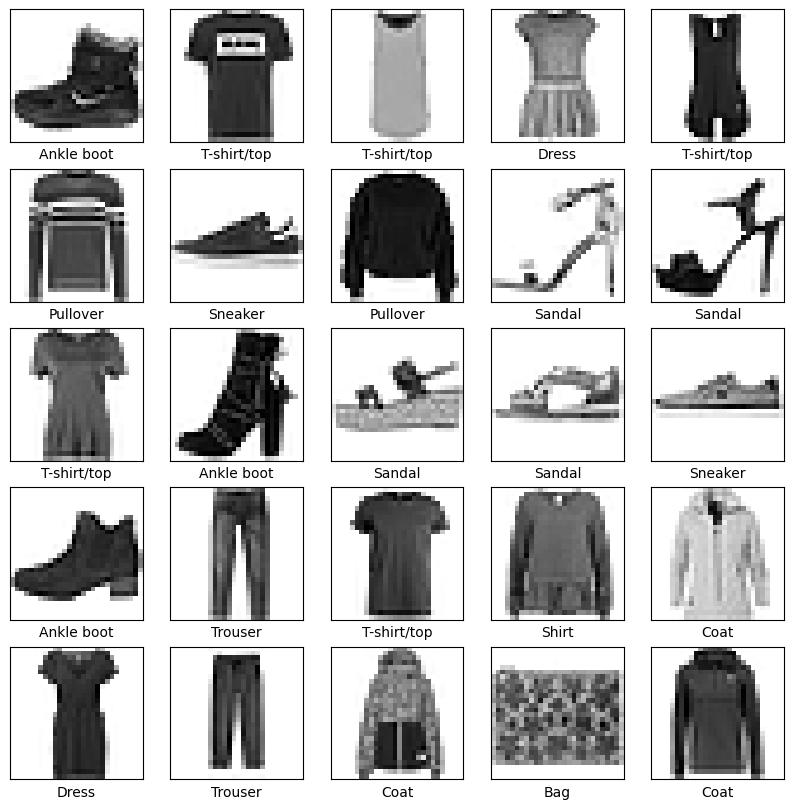

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
X_train=X_train/255
X_test=X_test/255

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [14]:
cnn_model = Sequential()

In [15]:
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
 cnn_model.add(MaxPooling2D(pool_size= (2,2)))

In [17]:
cnn_model.add(Flatten())

In [18]:
cnn_model.add(Dense(10,activation='relu'))

In [19]:
cnn_model.add(Dense(10,activation='sigmoid'))

In [20]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          54,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,520 (212.97 KB)

 Trainable params: 54,520 (212.97 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history=cnn_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7304 - loss: 0.7643 - val_accuracy: 0.8542 - val_loss: 0.4066
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8751 - loss: 0.3581 - val_accuracy: 0.8755 - val_loss: 0.3540
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8954 - loss: 0.3002 - val_accuracy: 0.8899 - val_loss: 0.3061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9050 - loss: 0.2672 - val_accuracy: 0.8908 - val_loss: 0.2989
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9098 - loss: 0.2536 - val_accuracy: 0.8965 - val_loss: 0.2863
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9169 - loss: 0.2369 - val_accuracy: 0.8967 - val_loss: 0.2892
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9208 - loss: 0.2239 - val_accuracy: 0.8965 - val_loss: 0.2940
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9263 -

In [23]:
 cnn_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9009 - loss: 0.2947


[0.28920555114746094, 0.901199996471405]

In [25]:
 probability_model = tf.keras.Sequential([cnn_model, tf.keras.layers.Softmax()])
 predictions = probability_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


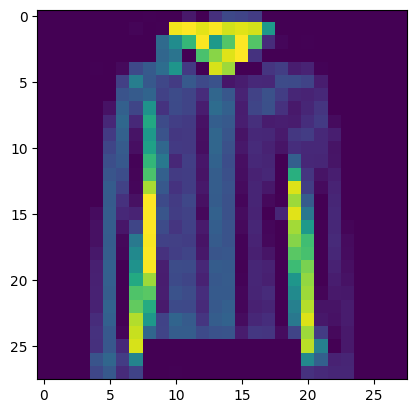

In [26]:
img = X_test[6]
plt.imshow(img)

In [27]:
y_predict = class_names[np.argmax(predictions[6])]
y_predict

'Coat'

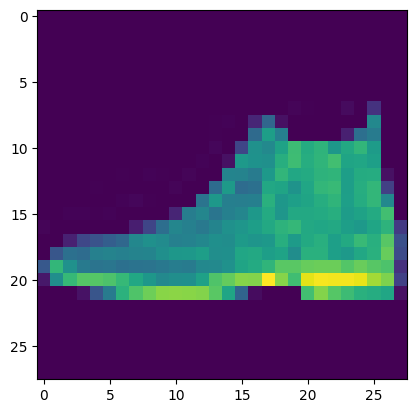

In [29]:
img = X_test[0]
plt.imshow(img)

In [30]:
y_predict = class_names[np.argmax(predictions[0])]
y_predict

'Ankle boot'

In [31]:
y_actual = class_names[y_test[0]]
y_actual

'Ankle boot'

In [32]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.9012 - loss: 0.2892


In [33]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.901199996471405


In [35]:
print(test_loss)

0.28920555114746094


In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

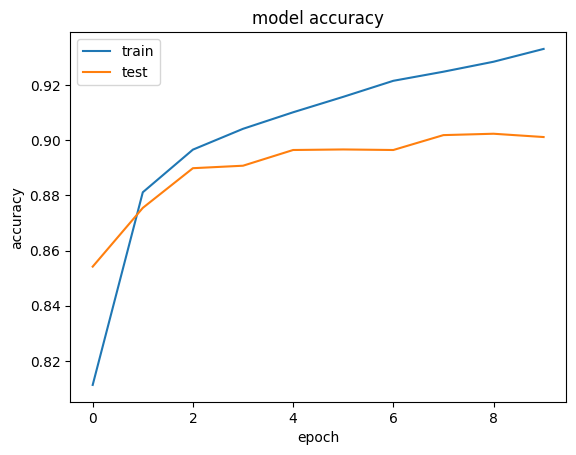

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

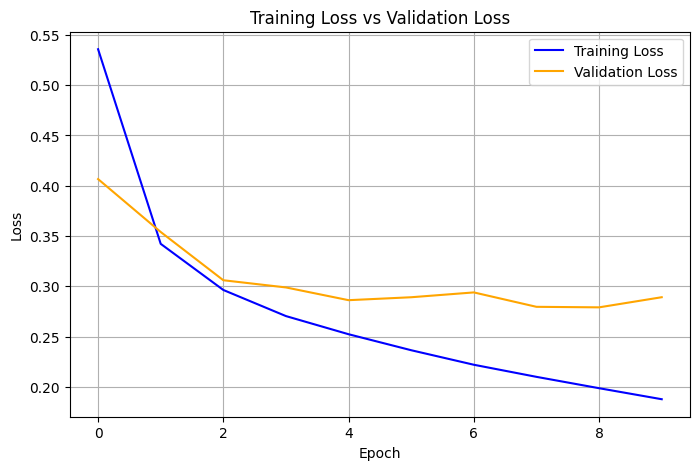

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()